# Step 1. Open the data file and study the general information

In [ ]:
### pip install seaborn -U to run alone, to upgrade seaborn library to its last version. Kernel restart needed.

In [ ]:
pip install seaborn -U

In [2]:
### Opening the file and starting studying general information of the dataset
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
from collections import Counter
from scipy import stats as st

company = pd.read_csv('/datasets/project_sql_result_01.csv')
trips = pd.read_csv('/datasets/project_sql_result_04.csv')
hypotesi = pd.read_csv('/datasets/project_sql_result_07.csv')

print('Displaying the tables of contents:')
print('')
display(company)
display(trips)
display(hypotesi)

Displaying the tables of contents:



,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [3]:
company.info()
print('')
print('The company dataset has', company.shape[0],'rows and', company.shape[1],'columns.')
print('')
trips.info()
print('')
print('The trips dataset has', trips.shape[0],'rows and', trips.shape[1],'columns.')
print('')
hypotesi.info()
print('')
print('The hypotesi dataset has', hypotesi.shape[0], 'rows and', hypotesi.shape[1],'columns.')
print('')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB

The company dataset has 64 rows and 2 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB

The trips dataset has 94 rows and 2 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB

The hypotesi dataset has 1068 rows and 3 columns.



In [4]:
print('The types for columns in company dataset are:')
print('')
print(company.dtypes)
print('')
print("Right datatypes. I can change the int64 to int16 to minimize the space volume of the program's execution")
print('')
print('')
print('The types for columns in trips dataset are:')
print('')
print(trips.dtypes)
print('Right datatypes.') # I will not change float64 since we need an high decimal precision.
print('')
print('')
print('The types for columns in hypotesi dataset are:')
print('')
print(hypotesi.dtypes)
print('')
print('Wrong datatypes! Replacing start_ts with a date type and duration seconds to int16.') # I can change the int64 to int16 to minimize the space volume of the program's execution.

The types for columns in company dataset are:

company_name    object
trips_amount     int64
dtype: object

Right datatypes. I can change the int64 to int16 to minimize the space volume of the program's execution


The types for columns in trips dataset are:

dropoff_location_name     object
average_trips            float64
dtype: object
Right datatypes.


The types for columns in hypotesi dataset are:

start_ts               object
weather_conditions     object
duration_seconds      float64
dtype: object

Wrong datatypes! Replacing start_ts with a date type and duration seconds to int16.


In [5]:
###COMPANY
print('Printing out the value counts for company_name column:')
print('')
print(company['company_name'].value_counts(dropna=False))
print('')
print('The number of None values is:', company['company_name'].isna().sum())
print('')
print('The number of unique company names in the column is:', company['company_name'].nunique())

Printing out the value counts for company_name column:

2823 - 73307 Lee Express Inc         1
Globe Taxi                           1
2809 - 95474 C & D Cab Co Inc.       1
Checker Taxi Affiliation             1
3721 - Santamaria Express            1
                                    ..
Blue Ribbon Taxi Association Inc.    1
Choice Taxi Association              1
Flash Cab                            1
Gold Coast Taxi                      1
Yellow Cab                           1
Name: company_name, Length: 64, dtype: int64

The number of None values is: 0

The number of unique company names in the column is: 64


In [6]:
print('Printing out the value counts for trips_amount column:')
print('')
print(company['trips_amount'].value_counts(dropna=False))
print('')
print('The number of None values is:', company['trips_amount'].isna().sum())
print('')
print('The number of unique values for trip_amount column is:', company['trips_amount'].nunique())

Printing out the value counts for trips_amount column:

29       3
14       3
21       2
33       2
7        2
15       2
127      1
1955     1
9888     1
31       1
11422    1
27       1
25       1
5015     1
3355     1
16       1
20       1
1404     1
146      1
1296     1
13       1
12       1
4383     1
8        1
5        1
3        1
2        1
36       1
37       1
39       1
9299     1
250      1
1014     1
1775     1
10367    1
7701     1
210      1
3175     1
19558    1
11       1
9181     1
7455     1
978      1
2216     1
1486     1
2070     1
1607     1
5953     1
230      1
2235     1
310      1
402      1
1259     1
428      1
147      1
8448     1
Name: trips_amount, dtype: int64

The number of None values is: 0

The number of unique values for trip_amount column is: 56


In [7]:
#### TRIPS
print('Printing out the value counts for dropoff_location_name column:')
print('')
print(trips['dropoff_location_name'].value_counts(dropna=False))
print('')
print('The number of None values is:', trips['dropoff_location_name'].isna().sum())
print('')
print('The number of unique dropoff location in the column is:', trips['dropoff_location_name'].nunique())

Printing out the value counts for dropoff_location_name column:

Wicker Park          1
Burnside             1
South Chicago        1
Riverdale            1
South Deering        1
                    ..
Mckinley Park        1
Lower West Side      1
Pullman              1
Loop                 1
Ukrainian Village    1
Name: dropoff_location_name, Length: 94, dtype: int64

The number of None values is: 0

The number of unique dropoff location in the column is: 94


In [8]:
print('Printing out the value counts for average_trips column:')
print('')
print(trips['average_trips'].value_counts(dropna=False))
print('')
print('The number of None values is:', trips['average_trips'].isna().sum())
print('')
print('The number of unique average_trips in the column is:', trips['average_trips'].nunique())

Printing out the value counts for average_trips column:

298.333333     1
16.133333      1
32.166667      1
14.166667      1
3.896552       1
              ..
59.033333      1
33.800000      1
8.233333       1
255.133333     1
1510.000000    1
Name: average_trips, Length: 94, dtype: int64

The number of None values is: 0

The number of unique average_trips in the column is: 94


In [9]:
###HYPOTESI.
print('Printing out the value counts for average_trips column:')
print('')
print(hypotesi['start_ts'].value_counts(dropna=False))
print('')
print('The number of None values is:', hypotesi['start_ts'].isna().sum())
print('')
print('The number of unique average_trips in the column is:', hypotesi['start_ts'].nunique())

Printing out the value counts for average_trips column:

2017-11-11 10:00:00    48
2017-11-04 14:00:00    46
2017-11-04 12:00:00    46
2017-11-11 06:00:00    45
2017-11-11 08:00:00    43
                       ..
2017-11-11 23:00:00     1
2017-11-18 00:00:00     1
2017-11-04 22:00:00     1
2017-11-25 19:00:00     1
2017-11-25 23:00:00     1
Name: start_ts, Length: 81, dtype: int64

The number of None values is: 0

The number of unique average_trips in the column is: 81


In [10]:
print('Printing out the value counts for average_trips column:')
print('')
print(hypotesi['weather_conditions'].value_counts(dropna=False))
print('')
print('The number of None values is:', hypotesi['weather_conditions'].isna().sum())
print('')
print('The number of unique average_trips in the column is:', hypotesi['weather_conditions'].nunique())

Printing out the value counts for average_trips column:

Good    888
Bad     180
Name: weather_conditions, dtype: int64

The number of None values is: 0

The number of unique average_trips in the column is: 2


In [11]:
print('Printing out the value counts for average_trips column:')
print('')
print(hypotesi['duration_seconds'].value_counts(dropna=False))
print('')
print('The number of None values is:', hypotesi['duration_seconds'].isna().sum())
print('')
print('The number of unique average_trips in the column is:', hypotesi['duration_seconds'].nunique())

Printing out the value counts for average_trips column:

1380.0    41
1260.0    35
1440.0    29
1320.0    23
1200.0    23
          ..
1538.0     1
2522.0     1
1174.0     1
2895.0     1
2491.0     1
Name: duration_seconds, Length: 495, dtype: int64

The number of None values is: 0

The number of unique average_trips in the column is: 495


# Step 1. Open the data file and study the general information
In the first step I analyzed the five presented dataframes.

The company table (data on companies):
- company_name: taxi company name / objects
- trips_amount: the number of rides for each taxi company on November 15-16, 2017./ integers

The trips table (data on trips):
- dropoff_location_name: Chicago neighborhoods where rides ended / objects
- average_trips: the average number of rides that ended in each neighborhood in November 2017. / floating numbers

The hypotesi table (data on weather for our hypotesi):
- start_ts: pickup date and time / object
- weather_conditions: weather conditions at the moment the ride started / object (wrong)
- duration_seconds: ride duration in seconds / float(wrong)

The dataset has no duplicates and no NaN values.

# Step 2. Prepare & change the data.

In [12]:
###COMPANY
#Changing trips_amount data type.
company.trips_amount = company.trips_amount.astype('int16')
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int16
dtypes: int16(1), object(1)
memory usage: 768.0+ bytes


In [13]:
###HYPOTESI
#Changing start_ts data type.
hypotesi.start_ts = pd.to_datetime(hypotesi.start_ts)
hypotesi.duration_seconds = hypotesi.duration_seconds.astype('int16')
hypotesi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null datetime64[ns]
weather_conditions    1068 non-null object
duration_seconds      1068 non-null int16
dtypes: datetime64[ns](1), int16(1), object(1)
memory usage: 18.9+ KB


In [14]:
#TRIPS
#Finding a TOP 10 dropoffs
trips = trips.sort_values('average_trips',ascending=False)
trips_top_10 = trips.query('index < 10')
display(trips_top_10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [15]:
### COMPANY 
#Finding a Top 10 company
company = company.sort_values('trips_amount',ascending=False)
company_top_10 = company.query('index < 10')
display(company_top_10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


# Step 2. Prepare & change the data.
CHANGING DATA TYPES.

In company dataframe:
- I changed trips_amount column data type from int64 to int16 to save space.

In hypotesi dataframe:
- I changed start_ts column to date time.
- duration_seconds from float to int16.

PREPARING DATA.
In trips dataframe:
- Found top 10 dropoffs.

In company dataframe:
- Found top 10 companies.

# STEP 3 - Exploratory Data Analysis (EDA)

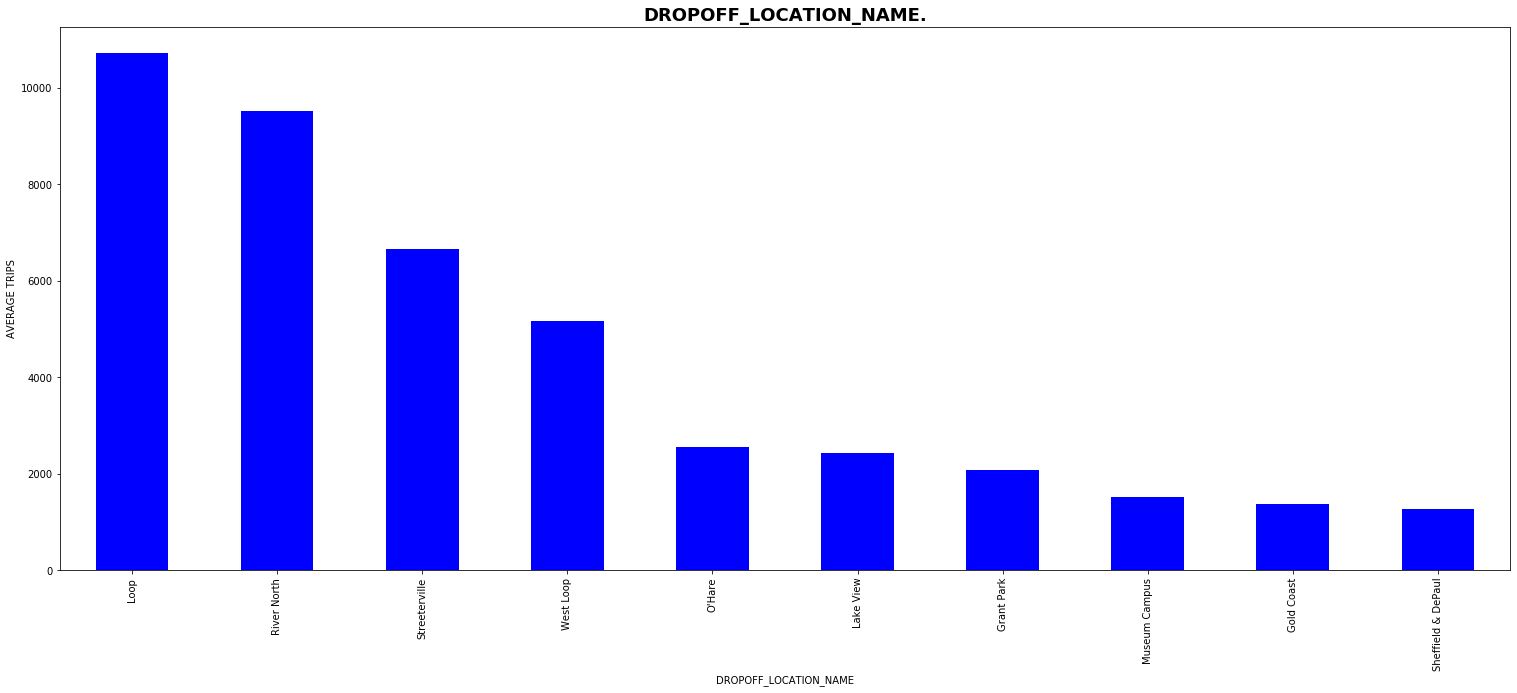

In [20]:
trips_top_10_bar = (trips_top_10.groupby('dropoff_location_name')['average_trips'].sum())
trips_top_10_bar = trips_top_10_bar.sort_values(ascending=False)
plt.figure(figsize=(26,10)) 
trips_top_10_bar.plot(kind='bar', color = 'blue')
plt.title('DROPOFF_LOCATION_NAME.', size =18, weight='bold')
plt.xlabel('DROPOFF_LOCATION_NAME')
plt.ylabel('AVERAGE TRIPS')
plt.show()

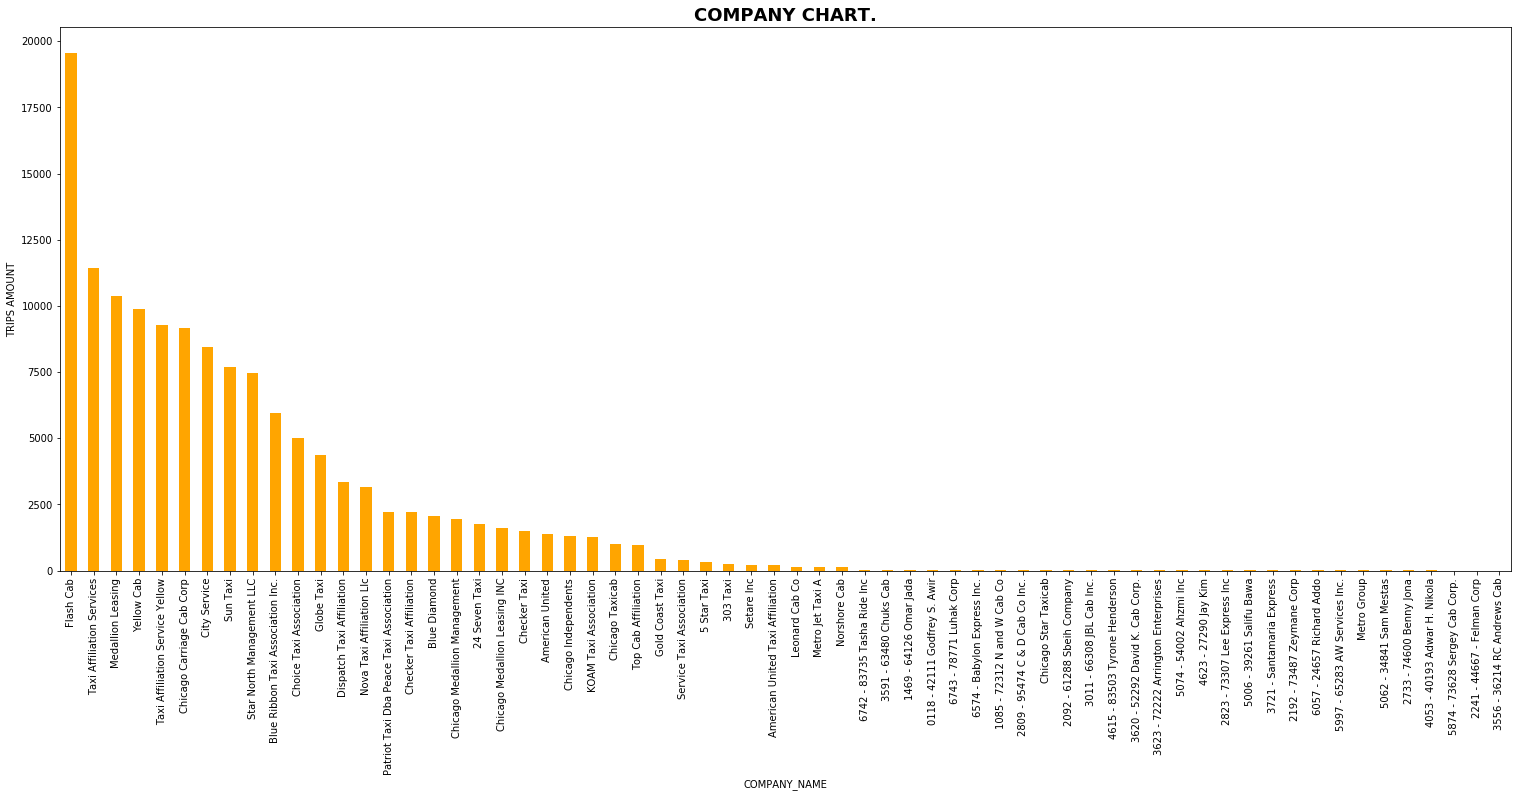

In [21]:
company_bar = (company.groupby('company_name')['trips_amount'].sum())
company_bar = company_bar.sort_values(ascending=False)
plt.figure(figsize=(26,10)) 
company_bar.plot(kind='bar', color = 'orange')
plt.title('COMPANY CHART.', size =18, weight='bold')
plt.xlabel('COMPANY_NAME')
plt.ylabel('TRIPS AMOUNT')
plt.show()

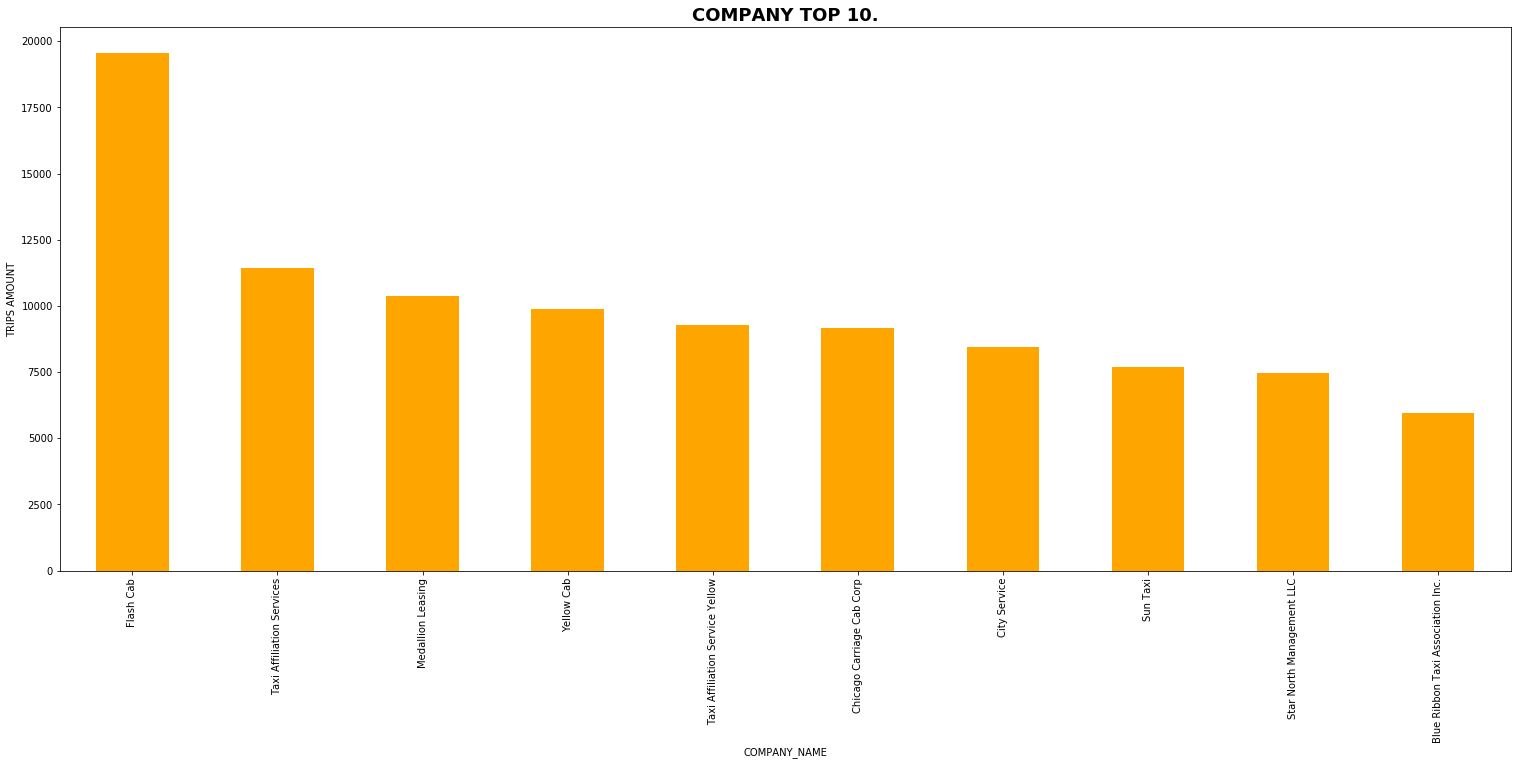

In [22]:
company_bar_10 = (company_top_10.groupby('company_name')['trips_amount'].sum())
company_bar_10 = company_bar_10.sort_values(ascending=False)
plt.figure(figsize=(26,10)) 
company_bar_10.plot(kind='bar', color = 'orange')
plt.title('COMPANY TOP 10.', size =18, weight='bold')
plt.xlabel('COMPANY_NAME')
plt.ylabel('TRIPS AMOUNT')
plt.show()

# STEP 3 - Exploratory Data Analysis (EDA)
FIRST BAR GRAPH = DROPOFF_LOCATION_NAME
- Gold Coast (1364.233333)
- Grant Park  (2068.533333)
- Lake View (2420.966667)
- Loop (10727.466667)
- Museum Campus (1510.000000)
- O'Hare (2546.900000)
- River North (9523.666667)
- Sheffield & DePaul (1259.766667)
- Streeterville (6664.666667)
- West Loop (5163.666667)

What is important about the graph?
- Loop and River North leads the chart in the first two position. 
- Second group formed by Streetville and West Loop.
- Third group Grant Park, Lake View, O'Hare.
- Last group Gold Coast, Museum Campus, Sheffield & DePaul.

- 4 of them are above 5000 rides
- 6 of them beneath 5000 rides.



SECOND BAR GRAPH = COMPANY CHART
What is important about the graph?
- 10 companies have more then 5500. We analize those in the next graph. ---- print(company.query('trips_amount > 5500').count())
- 2 companies among 5500 and 3500 trips.
- 5 companies among 3500 and 2000 trips.
- 8 companies among 2000 and 1000 trips.
- 1 company   among 1000 and 500 trips.
- 9 companies among 500 and 50 trips.
- 6 companies among 50 and 30 trips.
- 7 companies among 30 and 20 trips.
- 9 companies among 20 and 10 trips.
- 7 companies among 10 and 0 trips.



THIRD BAR GRAPH = COMPANY TOP 10
- Blue Ribbon Taxi Association Inc.     5953
- Chicago Carriage Cab Corp             9181
- City Service                          8448
- Flash Cab                            19558
- Medallion Leasing                    10367
- Star North Management LLC             7455
- Sun Taxi                              7701
- Taxi Affiliation Service Yellow       9299
- Taxi Affiliation Services            11422
- Yellow Cab                            9888

What is important about the graph? 
- Flash Cab is the absolute leader with more then 19000 rides.
- Taxi Affiliation Services and Medallion Leasing are the other over 10000 rides.
- Taxi Affiliation Services, Yellow Cab, Chicago Carriage Cab Corp, City Service
- Sun Taxi, Start North Managemnent LLC, Blue Ribbon Taxi Association Inc are in a range among 7800 rides and 5900.

# Step 4. Test the following hypothesi.

In [54]:
hypotesi_avg = hypotesi['duration_seconds'].groupby(hypotesi['weather_conditions']).mean()
display(hypotesi_avg)

weather_conditions
Bad     2427.205556
Good    1999.675676
Name: duration_seconds, dtype: float64

N0 = "The average duration of rides from the Loop to O'Hare International Airport is the same on rainy Saturdays."

NA = "There's a significance diffent in the average duration of rides from the Loop to O'Hare International Airport on rainy Saturdays."

In [24]:
from scipy import stats as st

N0 = hypotesi[hypotesi['weather_conditions'] == 'Bad']
NA = hypotesi[hypotesi['weather_conditions'] == 'Good']

alpha = .1                                                
                               
results = st.ttest_ind(N0['duration_seconds'], 
                        NA['duration_seconds'],
                          equal_var = False)

print(results1)

Ttest_indResult(statistic=7.186034288068629, pvalue=6.738994326108734e-12)


In [25]:
print('pvalue is :', results.pvalue)

if (results.pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

pvalue is : 6.738994326108734e-12
We reject the null hypothesis


# Step 4. Test the following hypothesi.
FIRST HYPOTESIS : Bad(duration_seconds) and Good(duration_seconds) have the same mean.

Bad     2427.205556
Good    1999.675676

N0 = The mean is the same 
NA = The mean is different

I expect to reject the hypotesis.

after calculating the pvalue is : 6.738994326108734e-12
We reject the null hypothesis. Successful.

# STEP 5. Write a general conclusion.

I draw in those lessons, some SQL tables with the help of queries. I took that data to analize them in Python. I loaded the three datasets and they represented: 

- The companies with the number of rides for each taxi company on November 15-16, 2017.
- The dropoffs locations and the average number of rides that ended in each neighborhood in November 2017.
- The rides from the Loop to O'Hare International Airport with weather informations.

I prepared the data to found top 10 charts and changed data types to the correct ones.


In Exploratory Data Analysis phase proceeded plotting bar graph.
Two things are clear from those graphs: 
- In November 2017, Loop and River North were the favorite dropoff location.
- On 15-16 November 2017, Flash Cab has done more trips, following we find Taxi Affiliation Services and Medallion Leasing.

In the end, I tested the hypotesi that the duration in seconds of rides in day of Bad or Good time was the same.
This resulted into a rejection of our hypotesi. "Bad" weather day have an higher durations of rides average compared to the "Good" one.